# Groupby, Aggregation & Visualization

## Looking to Open Pizza Restaurant

#### Dataset Source: https://www.kaggle.com/datasets/shilongzhuang/pizza-sales/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ls ../04_data

pizza_sales.xlsx


In [3]:
df = pd.read_excel("../04_data/pizza_sales.xlsx")

In [4]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


### Task 1: Get 'month wise' pizza sales trend.

In [6]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [7]:
df["order_date"]

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
48615   2015-12-31
48616   2015-12-31
48617   2015-12-31
48618   2015-12-31
48619   2015-12-31
Name: order_date, Length: 48620, dtype: datetime64[ns]

In [8]:
df["order_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48620 entries, 0 to 48619
Series name: order_date
Non-Null Count  Dtype         
--------------  -----         
48620 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 380.0 KB


In [9]:
df['month'] = df['order_date'].dt.month_name()

In [10]:
df[["month", "order_date"]]

,month,order_date
0,January,2015-01-01
1,January,2015-01-01
2,January,2015-01-01
3,January,2015-01-01
4,January,2015-01-01
...,...,...
48615,December,2015-12-31
48616,December,2015-12-31
48617,December,2015-12-31
48618,December,2015-12-31


In [17]:
month_groups = df.groupby("month")

In [18]:
month_groups

In [19]:
for name, group in month_groups:
    print(f'name: {name}')
    print(f'data frame: \n {group}')

name: April
data frame: 
        order_details_id  order_id        pizza_id  quantity order_date  \
12234             12235      5371      sicilian_m         1 2015-04-01   
12235             12236      5371   soppressata_l         1 2015-04-01   
12236             12237      5372     pepperoni_m         1 2015-04-01   
12237             12238      5372     the_greek_s         1 2015-04-01   
12238             12239      5373   four_cheese_m         1 2015-04-01   
...                 ...       ...             ...       ...        ...   
16296             16297      7167      sicilian_s         1 2015-04-30   
16297             16298      7168   five_cheese_l         1 2015-04-30   
16298             16299      7169  green_garden_s         1 2015-04-30   
16299             16300      7169    southw_ckn_l         1 2015-04-30   
16300             16301      7169    the_greek_xl         1 2015-04-30   

      order_time  unit_price  total_price pizza_size pizza_category  \
12234   11:17:

In [85]:
monthly_sales = df.groupby("month")["quantity"].sum()

In [86]:
monthly_sales

month
April        4151
August       4168
December     3935
February     3961
January      4232
July         4392
June         4107
March        4261
May          4328
November     4266
October      3883
September    3890
Name: quantity, dtype: int64

In [22]:
monthly_sales.nlargest(3)

,month,quantity
5,July,4392
8,May,4328
9,November,4266


In [21]:
monthly_sales = df.groupby("month")["quantity"].sum().reset_index()
monthly_sales

,month,quantity
0,April,4151
1,August,4168
2,December,3935
3,February,3961
4,January,4232
5,July,4392
6,June,4107
7,March,4261
8,May,4328
9,November,4266


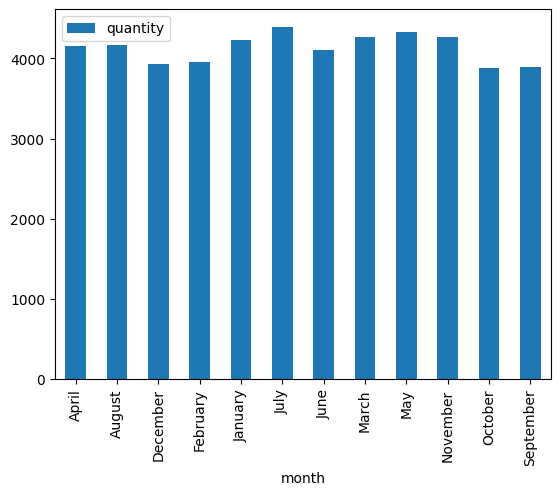

In [23]:
monthly_sales.plot(kind="bar", x="month", y="quantity")
plt.show()

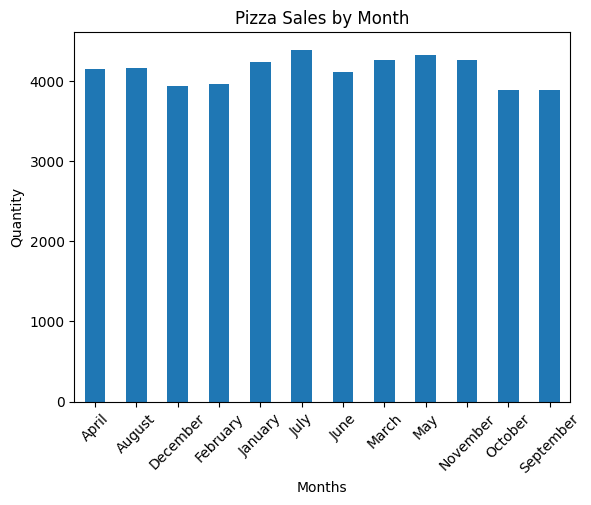

In [24]:
monthly_sales.plot(kind="bar", x="month", y="quantity", rot=45, legend=False)
plt.title("Pizza Sales by Month")
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.show()

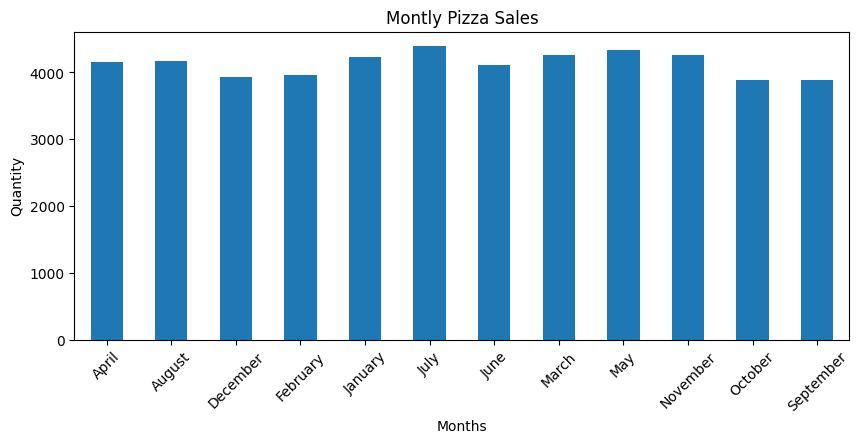

In [25]:
monthly_sales.plot(kind="bar", x="month", y="quantity", rot=45, figsize=(10,4), legend=False)
plt.title("Montly Pizza Sales")
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.show()

In [26]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     12 non-null     object
 1   quantity  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [27]:
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [28]:
monthly_sales['month'] = pd.Categorical(monthly_sales['month'], categories=custom_order, 
                                     ordered=True)

In [29]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   month     12 non-null     category
 1   quantity  12 non-null     int64   
dtypes: category(1), int64(1)
memory usage: 632.0 bytes


In [30]:
monthly_sales = monthly_sales.sort_values('month')

In [31]:
monthly_sales

,month,quantity
4,January,4232
3,February,3961
7,March,4261
0,April,4151
8,May,4328
6,June,4107
5,July,4392
1,August,4168
11,September,3890
10,October,3883


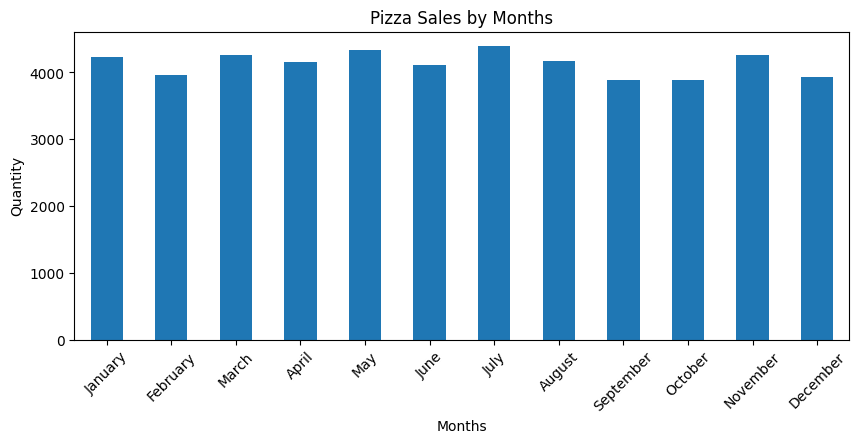

In [81]:
monthly_sales.plot(kind="bar", x="month", y="quantity", rot=45, legend=False, figsize=(10, 4))
plt.title("Pizza Sales by Months")
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.show()

### Task 2: Get number of sales and revenue across different categories.

In [41]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'month', 'day',
       'hour'],
      dtype='object')

In [42]:
df["pizza_category"].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [43]:
df.groupby('pizza_category')["quantity"].sum()

pizza_category
Chicken    11050
Classic    14888
Supreme    11987
Veggie     11649
Name: quantity, dtype: int64

In [44]:
df.groupby('pizza_category')["unit_price"].apply(lambda x: (x * df['quantity']).sum())

pizza_category
Chicken    195919.50
Classic    220053.10
Supreme    208197.00
Veggie     193690.45
Name: unit_price, dtype: float64

In [45]:
sales_per_category = df.groupby('pizza_category').agg(
    total_sales_per_category=('quantity', 'sum'),
    revenue_per_category=('unit_price', lambda x: (x * df['quantity']).sum())
).sort_values(by='revenue_per_category', ascending=False)

In [46]:
sales_per_category

,total_sales_per_category,revenue_per_category
pizza_category,,
Classic,14888,220053.10
Supreme,11987,208197.00
Chicken,11050,195919.50
Veggie,11649,193690.45


### Task 3: Get Order distribution by pizza size.

In [47]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'month', 'day',
       'hour'],
      dtype='object')

we have.. column.. pizza size.. (3s).. 

In [48]:
df["pizza_size"].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [49]:
sales_by_size = df.groupby("pizza_size")
    .agg(orders=("quantity", "sum"))
    .assign(percentage=lambda x: (x["orders"] / x["orders"].sum()) * 100.0)

print(sales_by_size)

            orders  percentage
pizza_size                    
L            18956   38.237786
M            15635   31.538710
S            14403   29.053536
XL             552    1.113487
XXL             28    0.056481


/var/folders/fz/vq1nstt92pb750vxln8mrc_80000gn/T/ipykernel_2939/2343519278.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby("pizza_size")


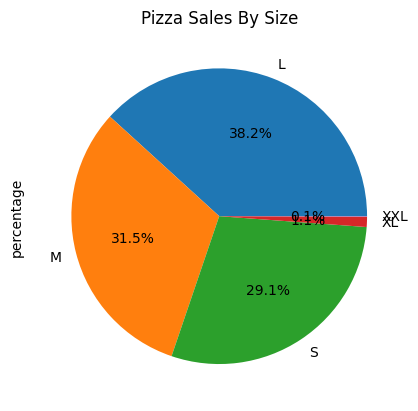

In [50]:
sales_by_size["percentage"].plot.pie(autopct="%1.1f%%")
plt.title("Pizza Sales By Size")
plt.show()

### Task 6: Find which categories are premium, where price of pizza is higher compared to average price of pizzas for the same size, across all categories. 

In [77]:
df.groupby("pizza_size")['unit_price'].mean()

pizza_size
L      19.802553
M      15.951219
S      12.364328
XL     25.500000
XXL    35.950000
Name: unit_price, dtype: float64

In [78]:
df['average_price_by_size'] = df.groupby("pizza_size")['unit_price'].transform('mean')

In [79]:
df[['pizza_size', 'unit_price', 'average_price_by_size']]

,pizza_size,unit_price,average_price_by_size
0,M,13.25,15.951219
1,M,16.00,15.951219
2,L,18.50,19.802553
3,L,20.75,19.802553
4,M,16.00,15.951219
...,...,...,...
48615,M,16.75,15.951219
48616,L,17.95,19.802553
48617,S,12.00,12.364328
48618,L,20.25,19.802553


In [ ]:
df['is_premium'] = df['unit_price'] > df['average_price_by_size']

In [83]:
premium_categories = df.groupby('pizza_category').filter(
                        lambda x: x['is_premium'].all())['pizza_category'].unique()

In [84]:
premium_categories

array(['Chicken'], dtype=object)

### Task 7: Get average order value

In [51]:
df["total_price"].mean()

16.821473673385437

In [52]:
df["quantity"].mean()

1.0196215549156726

### Task 8: Get total pizzas sold and total revenue

In [53]:
df["quantity"].sum()

49574

In [54]:
df["total_price"].sum()

817860.05

### Task 9: Get maximum order value

In [55]:
df["total_price"].max()

83.0